<h2><a href="https://leetcode.com/problems/accounts-merge">721. Accounts Merge</a></h2><h3>Medium</h3><hr><p>Given a list of <code>accounts</code> where each element <code>accounts[i]</code> is a list of strings, where the first element <code>accounts[i][0]</code> is a name, and the rest of the elements are <strong>emails</strong> representing emails of the account.</p>

<p>Now, we would like to merge these accounts. Two accounts definitely belong to the same person if there is some common email to both accounts. Note that even if two accounts have the same name, they may belong to different people as people could have the same name. A person can have any number of accounts initially, but all of their accounts definitely have the same name.</p>

<p>After merging the accounts, return the accounts in the following format: the first element of each account is the name, and the rest of the elements are emails <strong>in sorted order</strong>. The accounts themselves can be returned in <strong>any order</strong>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input:</strong> accounts = [[&quot;John&quot;,&quot;johnsmith@mail.com&quot;,&quot;john_newyork@mail.com&quot;],[&quot;John&quot;,&quot;johnsmith@mail.com&quot;,&quot;john00@mail.com&quot;],[&quot;Mary&quot;,&quot;mary@mail.com&quot;],[&quot;John&quot;,&quot;johnnybravo@mail.com&quot;]]
<strong>Output:</strong> [[&quot;John&quot;,&quot;john00@mail.com&quot;,&quot;john_newyork@mail.com&quot;,&quot;johnsmith@mail.com&quot;],[&quot;Mary&quot;,&quot;mary@mail.com&quot;],[&quot;John&quot;,&quot;johnnybravo@mail.com&quot;]]
<strong>Explanation:</strong>
The first and second John&#39;s are the same person as they have the common email &quot;johnsmith@mail.com&quot;.
The third John and Mary are different people as none of their email addresses are used by other accounts.
We could return these lists in any order, for example the answer [[&#39;Mary&#39;, &#39;mary@mail.com&#39;], [&#39;John&#39;, &#39;johnnybravo@mail.com&#39;], 
[&#39;John&#39;, &#39;john00@mail.com&#39;, &#39;john_newyork@mail.com&#39;, &#39;johnsmith@mail.com&#39;]] would still be accepted.
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> accounts = [[&quot;Gabe&quot;,&quot;Gabe0@m.co&quot;,&quot;Gabe3@m.co&quot;,&quot;Gabe1@m.co&quot;],[&quot;Kevin&quot;,&quot;Kevin3@m.co&quot;,&quot;Kevin5@m.co&quot;,&quot;Kevin0@m.co&quot;],[&quot;Ethan&quot;,&quot;Ethan5@m.co&quot;,&quot;Ethan4@m.co&quot;,&quot;Ethan0@m.co&quot;],[&quot;Hanzo&quot;,&quot;Hanzo3@m.co&quot;,&quot;Hanzo1@m.co&quot;,&quot;Hanzo0@m.co&quot;],[&quot;Fern&quot;,&quot;Fern5@m.co&quot;,&quot;Fern1@m.co&quot;,&quot;Fern0@m.co&quot;]]
<strong>Output:</strong> [[&quot;Ethan&quot;,&quot;Ethan0@m.co&quot;,&quot;Ethan4@m.co&quot;,&quot;Ethan5@m.co&quot;],[&quot;Gabe&quot;,&quot;Gabe0@m.co&quot;,&quot;Gabe1@m.co&quot;,&quot;Gabe3@m.co&quot;],[&quot;Hanzo&quot;,&quot;Hanzo0@m.co&quot;,&quot;Hanzo1@m.co&quot;,&quot;Hanzo3@m.co&quot;],[&quot;Kevin&quot;,&quot;Kevin0@m.co&quot;,&quot;Kevin3@m.co&quot;,&quot;Kevin5@m.co&quot;],[&quot;Fern&quot;,&quot;Fern0@m.co&quot;,&quot;Fern1@m.co&quot;,&quot;Fern5@m.co&quot;]]
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= accounts.length &lt;= 1000</code></li>
	<li><code>2 &lt;= accounts[i].length &lt;= 10</code></li>
	<li><code>1 &lt;= accounts[i][j].length &lt;= 30</code></li>
	<li><code>accounts[i][0]</code> consists of English letters.</li>
	<li><code>accounts[i][j] (for j &gt; 0)</code> is a valid email.</li>
</ul>

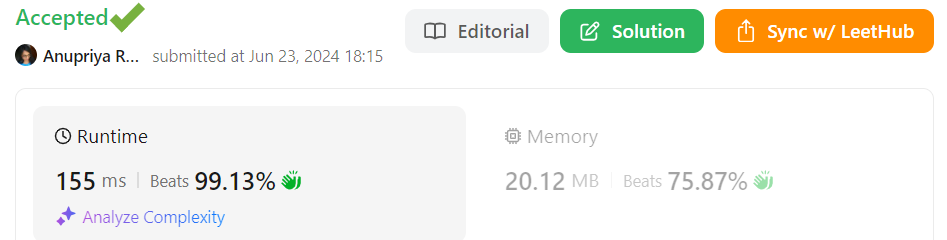

In [ ]:
from collections import defaultdict
class Solution:
    def accountsMerge(self, accounts: List[List[str]]) -> List[List[str]]:
        uf = UnionFind(len(accounts))
        email_id_map = dict()

        for id, data in enumerate(accounts):    # Map email to id and id corresponds to name
            for i in range(1, len(data)):
                if data[i] in email_id_map:
                    uf.union(id, email_id_map[data[i]])  # if an email is already there in map , then do a union ie. mark the parent list so with its main parent
                else:
                    email_id_map[data[i]] = id

        groupbyAccount = defaultdict(list)   # then make adjacency list with id and email list and here id will be its root id or ultimate parent
        for email, id in email_id_map.items():
            main_id = uf.find_root(id)
            groupbyAccount[main_id].append(email)


        res = []
        for id, emails in groupbyAccount.items():   # then get the result in the format required by the question
            name = [accounts[id][0]]    
            name.extend(sorted(emails))
            res.append(name)

        return res
            

class UnionFind:
    def __init__(self, size):
        self.root = list(range(size + 1))   # Parent list
        self.rank = [1] * size

    def find_root(self, node):
        if self.root[node] == node:
            return node

        self.root[node] = self.find_root(self.root[node])
        return self.root[node]

    def union(self, x, y):
        rootX = self.find_root(x)
        rootY = self.find_root(y)

        if rootX != rootY:
            if self.rank[rootX] > self.rank[rootY]:
                self.root[rootY] = rootX
            elif self.rank[rootX] < self.rank[rootY]:
                self.root[rootX] = rootY
            else:
                self.root[rootY] = rootX
                self.rank[rootX] += 1



        